In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-70.97255385198082 111.68547972549828
-17.832431043827 -66.49866417779839
17.92265357888536 63.15046618366162
88.72714164717163 -154.25888208133443
28.945761946477703 145.2024809846062
-39.9726600660646 -61.943132912356404
74.88269053691701 130.99729728506117
32.455579122819515 82.5523267057726
73.46594066637519 65.34520326332787
56.96084991932506 13.667000367589083
-84.62951407316986 103.89859851148117
10.13149404238763 -82.27438300318327
-54.41171047228229 -31.74456803728924
69.67647934302968 -122.10864118823673
-18.059238880341297 5.18923643414908
1.523405187798204 96.13604304555321
89.67374125740022 -167.30912807827752
-19.596482577235506 32.58793820202996
66.98374439174395 120.29713034182015
36.74834599737267 149.80981558897935
88.95552841970223 -156.81948733447027
-86.49336264588474 -167.2591719493824
-72.7660847916114 -93.05985207164585
18.4090811849656 35.95932454786998
75.6899396314075 -171.12157642705264
-26.390312595414258 -66.8905340805147
-83.26623430959394 -3.577527263733

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_weather_description = city_weather["weather"][0]["description"]

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | irpa irpa
Processing Record 3 of Set 1 | sur
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | punta alta
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | jumla
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | ljungby
Processing Record 11 of Set 1 | guabito
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | meulaboh
Processing Record 16 of Set 1 | chipinge
Processing Record 17 of Set 1 | zhigansk
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | sinkat
City not found. Skipping...
Processing Record 22 of Set 1 | lavrentiya
Process

Processing Record 35 of Set 4 | barawe
City not found. Skipping...
Processing Record 36 of Set 4 | abu dhabi
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | worth
Processing Record 39 of Set 4 | tabou
Processing Record 40 of Set 4 | samokov
Processing Record 41 of Set 4 | mareeba
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | rawson
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | taree
Processing Record 46 of Set 4 | wattegama
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | tahoua
Processing Record 49 of Set 4 | vanavara
Processing Record 50 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | bargal
City not found. Skipping...
Processing Record 3 of Set 5 | kars
Processing Record 4 of Set 5 | ofaqim
Processing Record 5 of Set 5 | urusha
Processing Record 6 of Set 5 | wharton
Processing Record 7 of Set 5 | cockburn town
Proc

Processing Record 25 of Set 8 | hasaki
Processing Record 26 of Set 8 | esna
Processing Record 27 of Set 8 | husavik
Processing Record 28 of Set 8 | stara zagora
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | portage
Processing Record 31 of Set 8 | lorengau
Processing Record 32 of Set 8 | minot
Processing Record 33 of Set 8 | araceli
Processing Record 34 of Set 8 | paragominas
Processing Record 35 of Set 8 | podor
Processing Record 36 of Set 8 | moba
Processing Record 37 of Set 8 | atar
Processing Record 38 of Set 8 | gladstone
Processing Record 39 of Set 8 | tuatapere
Processing Record 40 of Set 8 | alexandria
Processing Record 41 of Set 8 | ust-maya
Processing Record 42 of Set 8 | arti
Processing Record 43 of Set 8 | paddhari
Processing Record 44 of Set 8 | tiznit
Processing Record 45 of Set 8 | prieska
Processing Record 46 of Set 8 | tevaitoa
Processing Record 47 of Set 8 | waipawa
Processing Record 48 of Set 8 | cayenne
Processing Record 49 of Set 8 | praia da

Processing Record 13 of Set 12 | nuevo imperial
Processing Record 14 of Set 12 | patos de minas
Processing Record 15 of Set 12 | grandview
Processing Record 16 of Set 12 | palmer
Processing Record 17 of Set 12 | tura
Processing Record 18 of Set 12 | przhevalskoye
Processing Record 19 of Set 12 | campo verde
Processing Record 20 of Set 12 | pedasi
Processing Record 21 of Set 12 | fomboni
Processing Record 22 of Set 12 | kailua
Processing Record 23 of Set 12 | maun
Processing Record 24 of Set 12 | huarmey
Processing Record 25 of Set 12 | diapaga
Processing Record 26 of Set 12 | safford
Processing Record 27 of Set 12 | jinchang
Processing Record 28 of Set 12 | kloulklubed
Processing Record 29 of Set 12 | galle
Processing Record 30 of Set 12 | tocopilla
Processing Record 31 of Set 12 | sogdiondon
City not found. Skipping...
Processing Record 32 of Set 12 | nanakuli
Processing Record 33 of Set 12 | aqtobe
Processing Record 34 of Set 12 | tokuyama
Processing Record 35 of Set 12 | hualmay
Pro

In [10]:
len(city_data)

561

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Description,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,57.58,clear sky,74,9,2.80,US,2022-11-11 00:37:21
1,Irpa Irpa,-17.7167,-66.2667,69.80,scattered clouds,50,37,5.95,BO,2022-11-11 00:40:47
2,Sur,22.5667,59.5289,76.05,clear sky,70,5,2.33,OM,2022-11-11 00:40:47
3,Barrow,71.2906,-156.7887,26.62,mist,93,75,19.57,US,2022-11-11 00:40:09
4,Katsuura,35.1333,140.3000,67.51,clear sky,57,0,15.01,JP,2022-11-11 00:40:48
5,Punta Alta,-38.8759,-62.0736,67.87,clear sky,38,2,8.81,AR,2022-11-11 00:40:48
6,Tiksi,71.6872,128.8694,-15.20,overcast clouds,100,98,4.52,RU,2022-11-11 00:40:48
7,Jumla,29.2747,82.1838,37.45,clear sky,67,0,4.72,NP,2022-11-11 00:40:49
8,Ljungby,56.8332,13.9408,54.01,overcast clouds,90,100,16.73,SE,2022-11-11 00:40:49
9,Guabito,9.5000,-82.6167,79.05,light rain,89,100,2.39,PA,2022-11-11 00:40:49


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

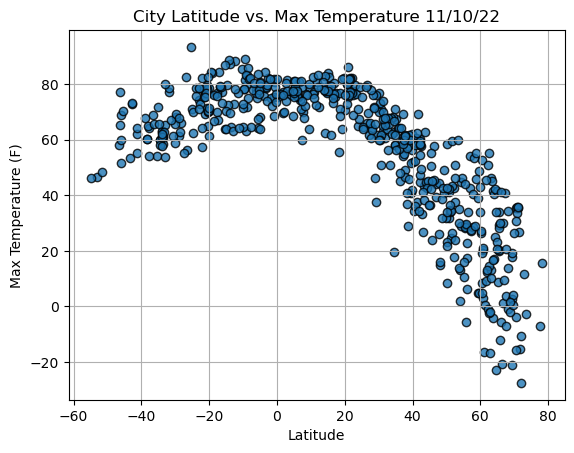

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

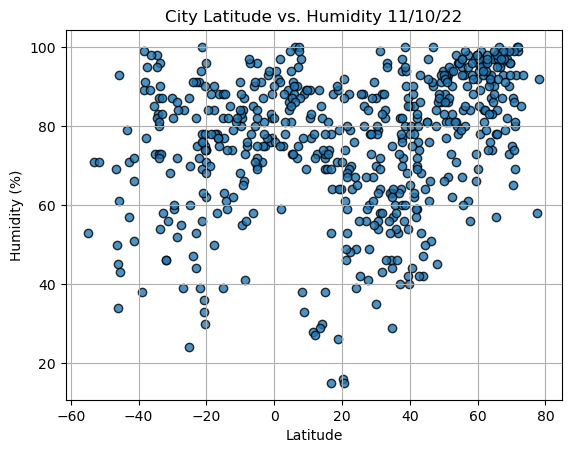

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

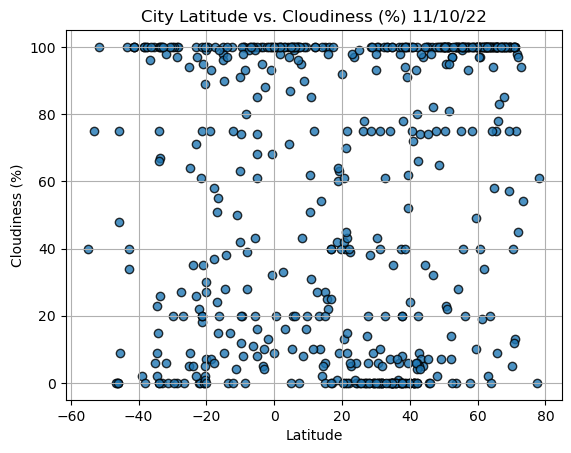

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

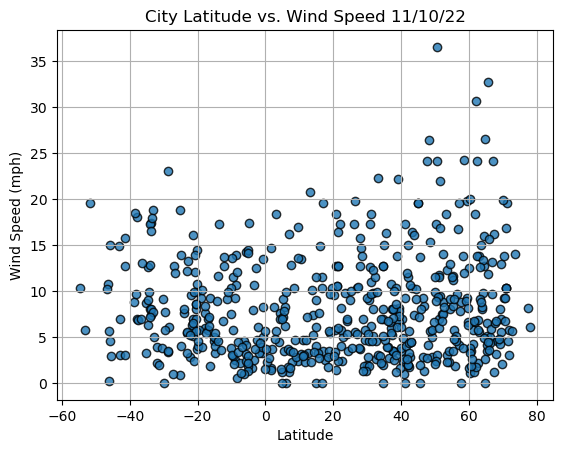

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")
    

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Meulaboh
Country                        ID
Date          2022-11-11 00:40:50
Lat                        4.1363
Lng                       96.1285
Max Temp                    75.97
Humidity                       89
Cloudiness                    100
Wind Speed                   4.47
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-11-11 00:37:21,42.6001,-73.9662,57.58,74,9,2.80
2,Sur,OM,2022-11-11 00:40:47,22.5667,59.5289,76.05,70,5,2.33
3,Barrow,US,2022-11-11 00:40:09,71.2906,-156.7887,26.62,93,75,19.57
4,Katsuura,JP,2022-11-11 00:40:48,35.1333,140.3000,67.51,57,0,15.01
6,Tiksi,RU,2022-11-11 00:40:48,71.6872,128.8694,-15.20,100,98,4.52


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

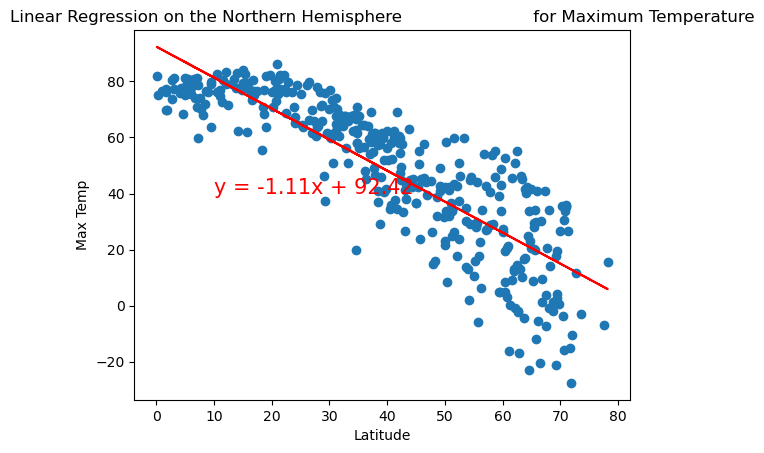

The r-value is -0.853


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

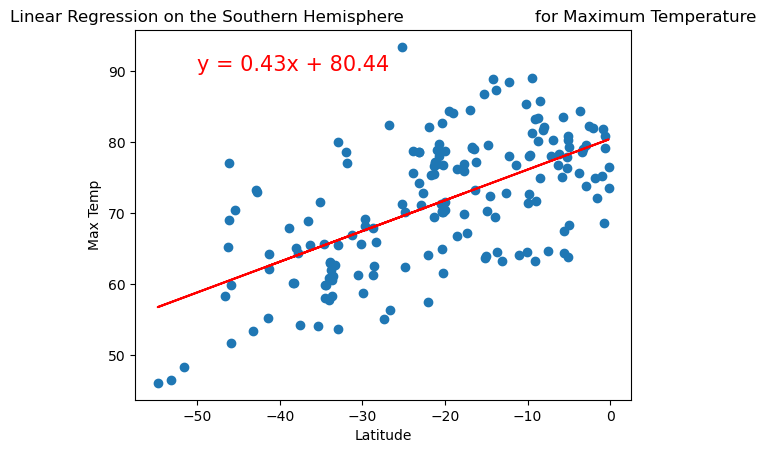

The r-value is 0.613


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

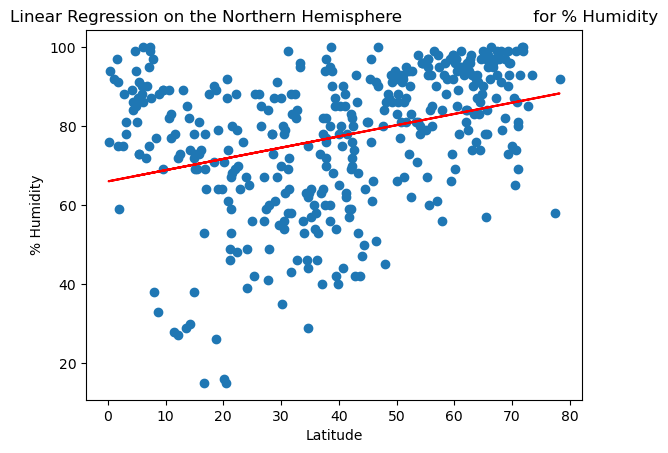

The r-value is 0.326


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

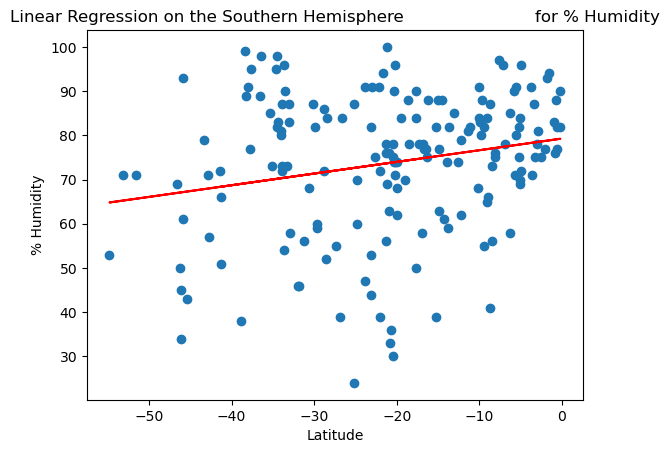

The r-value is 0.217


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

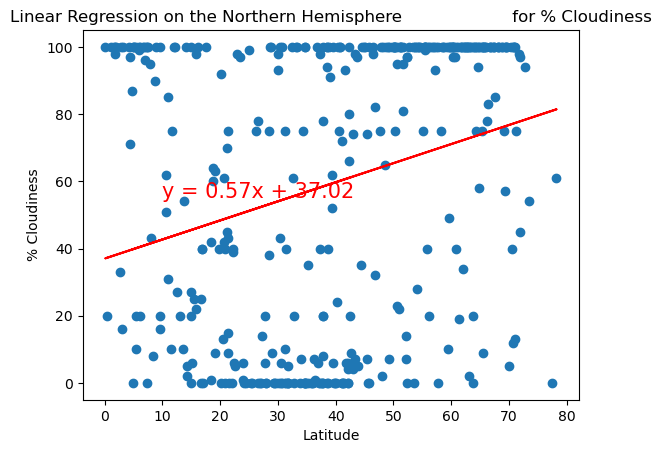

The r-value is 0.272


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

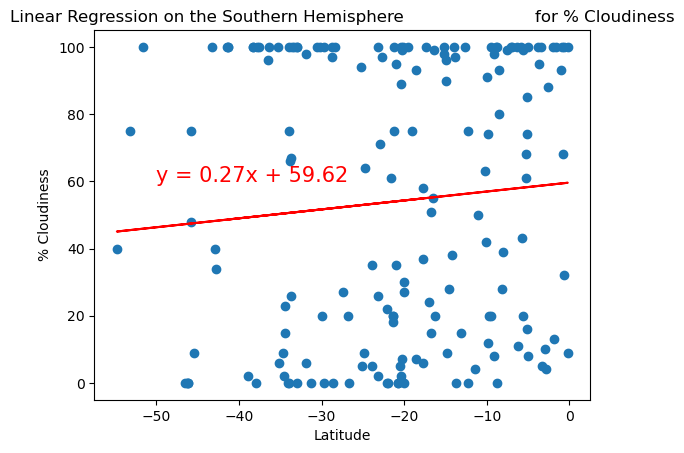

The r-value is 0.086


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

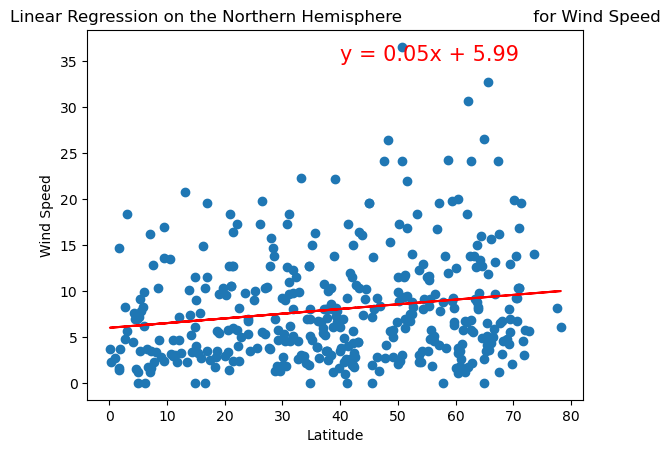

The r-value is 0.175


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

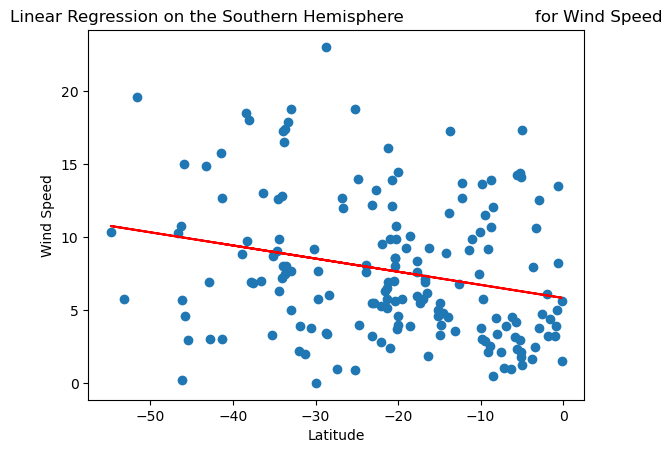

The r-value is -0.248


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))